In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vechicle-dataset/vechicles/train/scooty/images (8).jpg
/kaggle/input/vechicle-dataset/vechicles/train/scooty/2Q__ (1).jpg
/kaggle/input/vechicle-dataset/vechicles/train/scooty/images (18).jpg
/kaggle/input/vechicle-dataset/vechicles/train/scooty/images (16).jpg
/kaggle/input/vechicle-dataset/vechicles/train/scooty/images (13).jpg
/kaggle/input/vechicle-dataset/vechicles/train/scooty/9k_ (7).jpg
/kaggle/input/vechicle-dataset/vechicles/train/scooty/2Q__ (3).jpg
/kaggle/input/vechicle-dataset/vechicles/train/scooty/images (7).jpg
/kaggle/input/vechicle-dataset/vechicles/train/scooty/2Q__ (5).jpg
/kaggle/input/vechicle-dataset/vechicles/train/scooty/images.jpg
/kaggle/input/vechicle-dataset/vechicles/train/scooty/images (6).jpg
/kaggle/input/vechicle-dataset/vechicles/train/scooty/Z (4).jpg
/kaggle/input/vechicle-dataset/vechicles/train/scooty/images (3).jpg
/kaggle/input/vechicle-dataset/vechicles/train/scooty/9k_ (4).jpg
/kaggle/input/vechicle-dataset/vechicles/train/scoot

In [51]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [52]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/Users/Hp/Documents/ML/NEW/vechicle_with_train/vechicles/train'
valid_path = '/Users/Hp/Documents/ML/NEW/vechicle_with_train/vechicles/test'

In [53]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [54]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [55]:
  # useful for getting number of classes
folders = glob('/Users/Hp/Documents/ML/NEW/vechicle_with_train/vechicles/train')

In [56]:
vechicle=os.listdir(train_path)
vechicle.sort()
vechicle

['bike',
 'boat',
 'bus',
 'car',
 'cycle',
 'helicopter',
 'plane',
 'scooty',
 'train',
 'truck']

In [57]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [58]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [59]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [60]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [61]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [62]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 528 images belonging to 10 classes.


In [63]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 74 images belonging to 10 classes.


In [64]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
33/33 [==============================] - 7s 198ms/step - loss: 1.7351 - accuracy: 0.5265 - val_loss: 0.8745 - val_accuracy: 0.7432
Epoch 2/5
33/33 [==============================] - 6s 192ms/step - loss: 0.3287 - accuracy: 0.8883 - val_loss: 0.8101 - val_accuracy: 0.7703
Epoch 3/5
33/33 [==============================] - 6s 193ms/step - loss: 0.2865 - accuracy: 0.8958 - val_loss: 0.7578 - val_accuracy: 0.7568
Epoch 4/5
33/33 [==============================] - 6s 186ms/step - loss: 0.1324 - accuracy: 0.9621 - val_loss: 0.7819 - val_accuracy: 0.7568
Epoch 5/5
33/33 [==============================] - 7s 199ms/step - loss: 0.0938 - accuracy: 0.9735 - val_loss: 0.8355 - val_accuracy: 0.7568


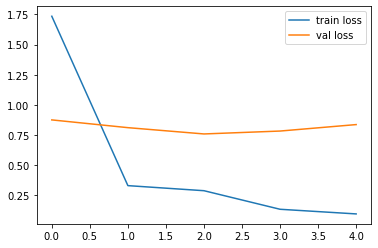

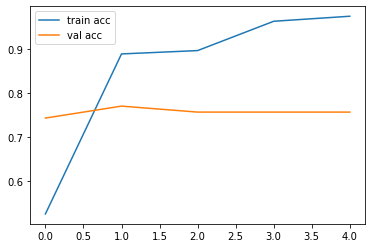

<Figure size 432x288 with 0 Axes>

In [65]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [66]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg19.h5')

In [73]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('model_vgg19.h5')
img = image.load_img('../input/vechicle-dataset/vechicle_with_train/vechicles/test/train/Z (8).jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

In [74]:
classes

array([[0.0000000e+00, 0.0000000e+00, 5.7530426e-38, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [75]:
top3=sorted(range(len(classes[0])), key=lambda i: classes[0][i])[-3:]

In [76]:
top3.reverse()

In [77]:
print(top3)

[8, 2, 9]


In [78]:
for i in top3:
    print(i)
    print(str(vechicle[i])+": %"+str(classes[0][i]*100)+"\n")

8
train: %100.0

2
bus: %5.753042616192637e-36

9
truck: %0.0

